In [1]:
import function_board as fb
import function_tool as ft
import function_get_aiming_grid
import numpy as np
import os
import matplotlib.pyplot as plt

# 废弃

In [28]:
result_dir = '../HW_result'  # 确保这个路径指向了你的文件实际所在的目录
playerIDs = [7, 11, 12]

V_matrices = {}
optimal_action_indices = {}

# 遍历每个playerID并读取相应的数据
for playerID in playerIDs:
    V_path = os.path.join(result_dir, f'player{playerID}_V.npy')
    action_index_path = os.path.join(result_dir, f'player{playerID}_optimal_action_index.npy')

    # 检查文件是否存在
    if os.path.exists(V_path) and os.path.exists(action_index_path):
        V_matrices[playerID] = np.load(V_path)
        optimal_action_indices[playerID] = np.load(action_index_path)
    else:
        print(f"Data for player {playerID} not found.")

In [29]:
for playerID in playerIDs:
    print(f'This is for Player{playerID}:')
    print(V_matrices[playerID][50, 2, 0], end="\t")
    print(V_matrices[playerID][101, 2, 0], end="\t")
    print(V_matrices[playerID][301, 2, 0], end="\t")
    print(V_matrices[playerID][501, 2, 0])
    print(optimal_action_indices[playerID][50, 2, 0], end="\t")
    print(optimal_action_indices[playerID][101, 2, 0], end="\t")
    print(optimal_action_indices[playerID][301, 2, 0], end="\t")
    print(optimal_action_indices[playerID][501, 2, 0])

This is for Player7:
1.4469147	1.9547266	3.7285864	5.4893055
938	382	382	382
This is for Player11:
1.595818	2.140134	3.9724417	5.814699
938	382	983	382
This is for Player12:
1.5970602	2.1117694	3.987276	5.8636713
930	382	382	983


# ValueIter

In [3]:
result_dir = '../HW_result'  # 确保这个路径指向了你的文件实际所在的目录
playerIDs = [7]

V_matrices = {}
optimal_action_indices = {}

for playerID in playerIDs:
    V_path = os.path.join(result_dir, f'player{playerID}_valueiter_V.npy')
    action_index_path = os.path.join(result_dir, f'player{playerID}_valueiter_Mu.npy')

    if os.path.exists(V_path) and os.path.exists(action_index_path):
        V_matrices[playerID] = np.load(V_path)
        optimal_action_indices[playerID] = np.load(action_index_path)
    else:
        print(f"Data for player {playerID} not found.")

In [6]:
for playerID in playerIDs:
    print(f'This is for Player{playerID} value:')
    print(f"{V_matrices[playerID][50, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][101, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][301, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][501, 2, 0]:.3f}")

    print(optimal_action_indices[playerID][50, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][101, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][301, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][501, 2, 0])

This is for Player7 value:
1.447	1.955	3.729	5.489
938		382		382		382


# PolicyIter

In [2]:
result_dir = '../HW_result'  # 确保这个路径指向了你的文件实际所在的目录
playerIDs = [5]

V_matrices = {}
optimal_action_indices = {}

# 遍历每个playerID并读取相应的数据
for playerID in playerIDs:
    V_path = os.path.join(result_dir, f'player{playerID}_policyiter_V.npy')
    action_index_path = os.path.join(result_dir, f'player{playerID}_policyiter_Mu.npy')

    # 检查文件是否存在
    if os.path.exists(V_path) and os.path.exists(action_index_path):
        V_matrices[playerID] = np.load(V_path)
        optimal_action_indices[playerID] = np.load(action_index_path)
    else:
        print(f"Data for player {playerID} not found.")

In [3]:
for playerID in playerIDs:
    print(f'This is for Player{playerID} policy:')
    print(f"{V_matrices[playerID][50, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][101, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][301, 2, 0]:.3f}", end="\t")
    print(f"{V_matrices[playerID][501, 2, 0]:.3f}")
    print(optimal_action_indices[playerID][50, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][101, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][301, 2, 0], end="\t\t")
    print(optimal_action_indices[playerID][501, 2, 0])

This is for Player5 policy:
1.428	1.992	3.852	5.684
938		310		382		382


player5会在只剩30分的时候瞄准哪个点呢？
load_pickle from ../../data_parameter/player_gaussin_fit/grid_v2/player5_gaussin_prob_grid_v2.pkl
瞄准934号点！


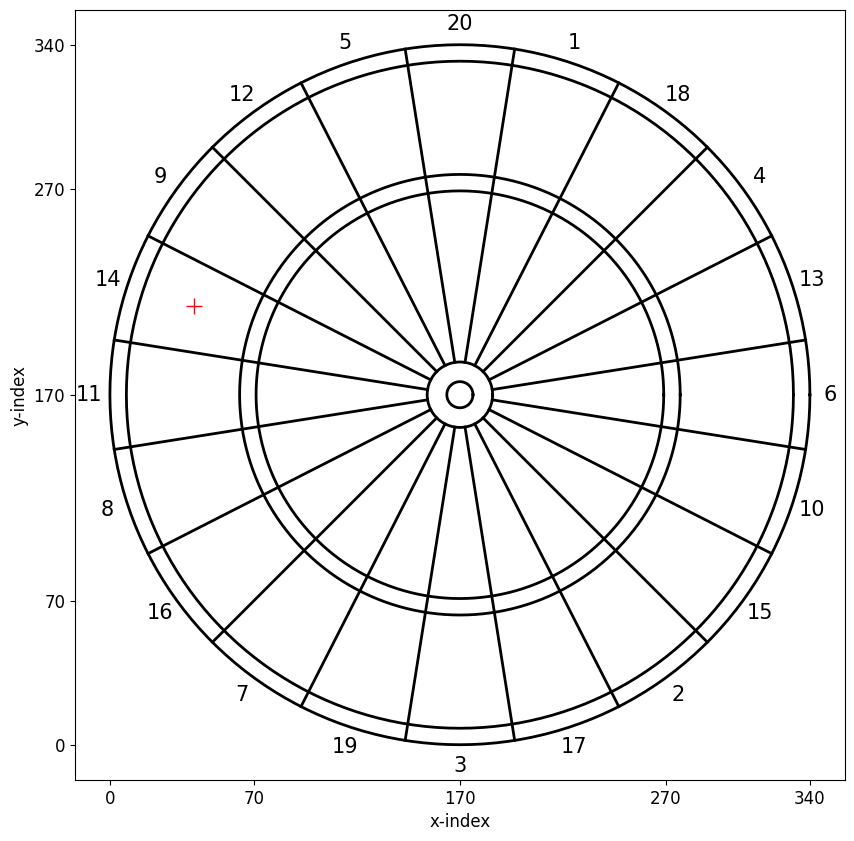

In [6]:
score_state = 30
playerID = 5
throws_left_in_turn = 3
scores_get_in_turn = 0
print(f'player{playerID}会在只剩{score_state}分的时候瞄准哪个点呢？')
name_pa = 'player{}'.format(playerID)
[aiming_grid, prob_grid_normalscore, prob_grid_singlescore, prob_grid_doublescore, prob_grid_triplescore,
 prob_grid_bullscore] = function_get_aiming_grid.load_aiming_grid(name_pa)
aming_spot = optimal_action_indices[playerID][score_state, throws_left_in_turn - 1, scores_get_in_turn]
print(f'瞄准{aming_spot}号点！')
fb.plot_dartboard(flag_index=True)
plt.plot(aiming_grid[aming_spot, 0], aiming_grid[aming_spot, 1], '+', color='red', markersize=12)
plt.show()